# 1. KL Divergence
KL divergence measures the difference between two probability distributions. It is not symmetric and is typically used to see how one distribution diverges from another. However, it does not provide a definitive test for whether two distributions are from the same family, but rather quantifies how different they are.

In [4]:
import numpy as np
from scipy.stats import norm, entropy

# Function to calculate KL Divergence for continuous distributions
def kl_divergence_continuous(p, q, x):
    return np.trapz(p * np.log(p / q), x)

# Generate sample data
x = np.linspace(-10, 10, 1000)
p_continuous = norm.pdf(x, 0, 1)
q_continuous = norm.pdf(x, 0, 1.5)  # Slightly different distribution

# Calculate KL divergence
kl_continuous = kl_divergence_continuous(p_continuous, q_continuous, x)
print(f"KL Divergence: {kl_continuous}")

KL Divergence: 0.12768733033038662


# 2. Kolmogorov-Smirnov (KS) Test
The KS test is a non-parametric test that compares the cumulative distribution functions of two samples. It is used to test the null hypothesis that the samples are drawn from the same distribution.

Implementation in Python:

In [10]:
from scipy.stats import ks_2samp

# Generate sample data
data1 = np.random.normal(0, 1, 1000)  # Sample from distribution 1
data2 = np.random.normal(0, 1.5, 1000)  # Sample from distribution 2

# Perform KS test
ks_statistic, p_value = ks_2samp(data1, data2)
print(f"KS Statistic: {ks_statistic}, p-value: {p_value}")

# Interpret the result
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis - the samples are from different distributions")
else:
    print("Fail to reject the null hypothesis - the samples are from the same distribution")


KS Statistic: 0.13, p-value: 8.797089063129894e-08
Reject the null hypothesis - the samples are from different distributions


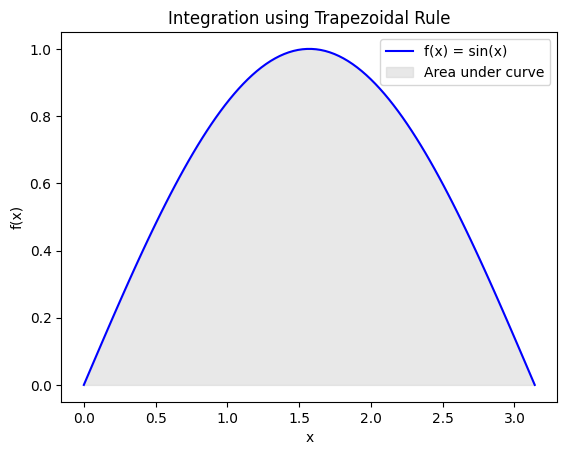

Approximate integral using trapezoidal rule: 1.9998321638939927


In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function
def f(x):
    return np.sin(x)

# Define the interval [0, pi]
a = 0
b = np.pi

# Define the number of intervals
n = 100

# Generate the x-values (equally spaced)
x = np.linspace(a, b, n)

# Compute the function values
y = f(x)

# Compute the trapezoidal rule
integral = np.trapz(y, x)

# Plot the function
plt.plot(x, y, label='f(x) = sin(x)', color='blue')

# Plot the trapezoids
plt.fill_between(x, y, color='lightgray', alpha=0.5, label='Area under curve')

# Add labels and legend
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Integration using Trapezoidal Rule')
plt.legend()

# Show the plot
plt.show()

# Print the computed integral
print(f"Approximate integral using trapezoidal rule: {integral}")

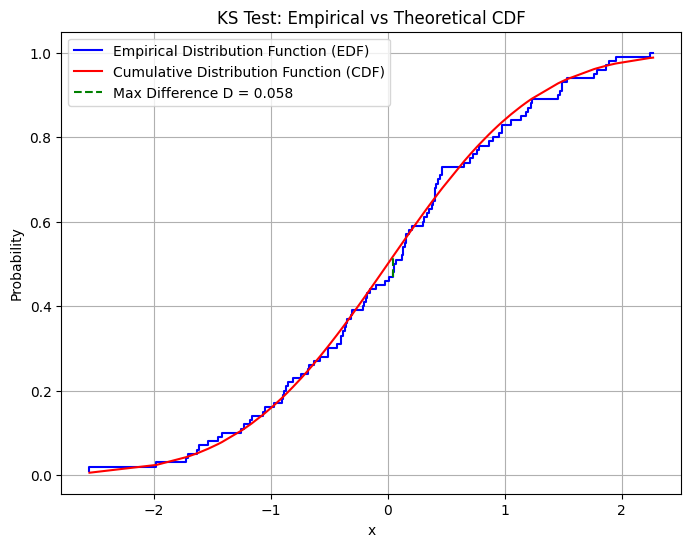

KS Test Statistic: 0.0582486387238324
P-value: 0.8667717341286251


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kstest, norm

# Generate sample data
np.random.seed(0)
data = np.random.normal(loc=0, scale=1, size=100)

# Perform the KS test
result = kstest(data, 'norm')

# Calculate the EDF of the sample data
data_sorted = np.sort(data)
edf = np.arange(1, len(data) + 1) / len(data)

# Calculate the CDF of the normal distribution
cdf = norm.cdf(data_sorted)

# Plot the EDF and CDF
plt.figure(figsize=(8, 6))
plt.step(data_sorted, edf, label='Empirical Distribution Function (EDF)', color='blue')
plt.plot(data_sorted, cdf, label='Cumulative Distribution Function (CDF)', color='red')
plt.title('KS Test: Empirical vs Theoretical CDF')
plt.xlabel('x')
plt.ylabel('Probability')
plt.legend()
plt.grid(True)

# Highlight the maximum difference
D = result.statistic
max_diff_index = np.argmax(np.abs(edf - cdf))
plt.vlines(data_sorted[max_diff_index], edf[max_diff_index], cdf[max_diff_index], color='green', linestyle='--', label=f'Max Difference D = {D:.3f}')
plt.legend()

plt.show()

print(f"KS Test Statistic: {D}")
print(f"P-value: {result.pvalue}")


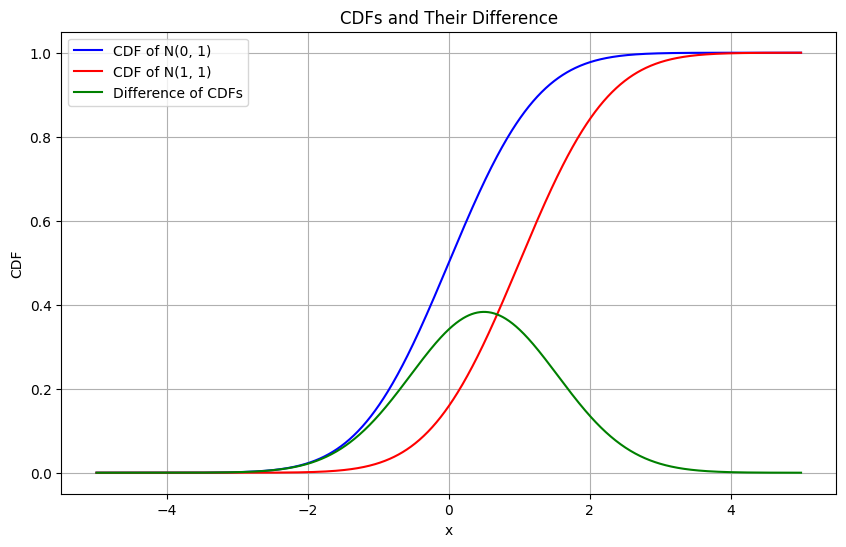

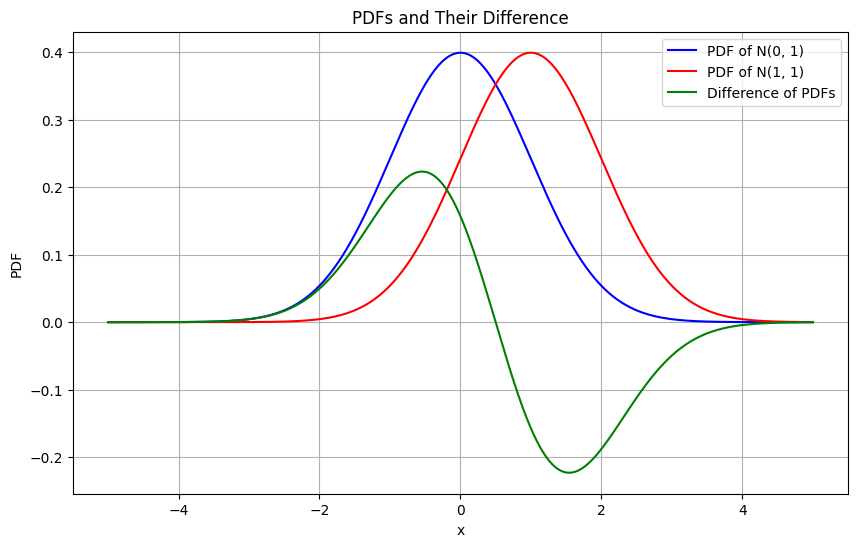

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Define the CDFs of the two normal distributions
def F1(x):
    return norm.cdf(x, loc=0, scale=1)

def F2(x):
    return norm.cdf(x, loc=1, scale=1)

# Define the PDFs (derivatives of the CDFs)
def f1(x):
    return norm.pdf(x, loc=0, scale=1)

def f2(x):
    return norm.pdf(x, loc=1, scale=1)

# Define the range of x values
x = np.linspace(-5, 5, 1000)

# Calculate the difference of the CDFs and their derivatives
D = F1(x) - F2(x)
D_prime = f1(x) - f2(x)

# Plot the CDFs
plt.figure(figsize=(10, 6))
plt.plot(x, F1(x), label='CDF of N(0, 1)', color='blue')
plt.plot(x, F2(x), label='CDF of N(1, 1)', color='red')
plt.plot(x, D, label='Difference of CDFs', color='green')
plt.title('CDFs and Their Difference')
plt.xlabel('x')
plt.ylabel('CDF')
plt.legend()
plt.grid(True)
plt.show()

# Plot the difference of the PDFs (derivatives of the CDFs)
plt.figure(figsize=(10, 6))
plt.plot(x, f1(x), label='PDF of N(0, 1)', color='blue')
plt.plot(x, f2(x), label='PDF of N(1, 1)', color='red')
plt.plot(x, D_prime, label='Difference of PDFs', color='green')
plt.title('PDFs and Their Difference')
plt.xlabel('x')
plt.ylabel('PDF')
plt.legend()
plt.grid(True)
plt.show()


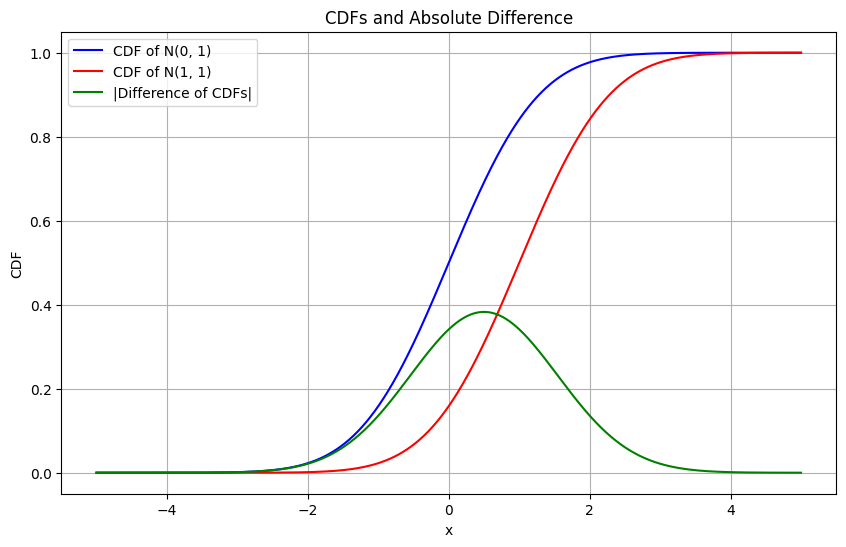

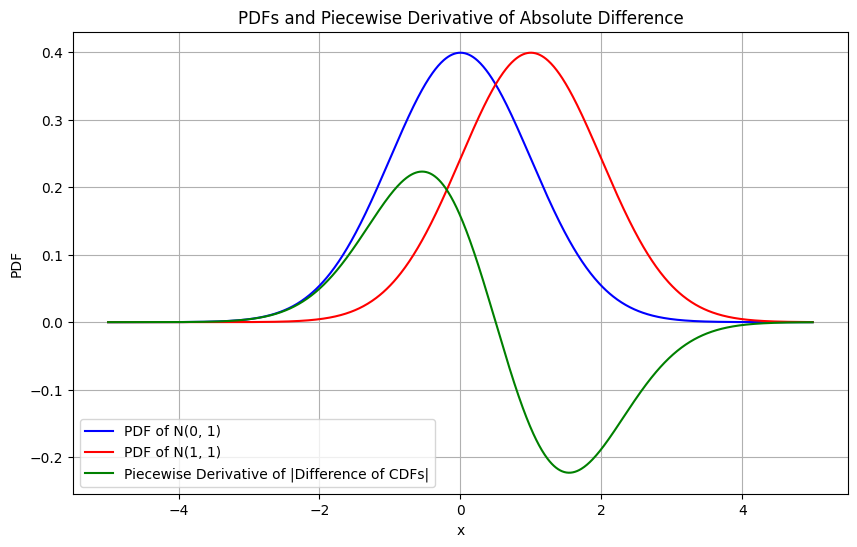

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Define the CDFs of the two normal distributions
def F1(x):
    return norm.cdf(x, loc=0, scale=1)

def F2(x):
    return norm.cdf(x, loc=1, scale=1)

# Define the PDFs (derivatives of the CDFs)
def f1(x):
    return norm.pdf(x, loc=0, scale=1)

def f2(x):
    return norm.pdf(x, loc=1, scale=1)

# Define the range of x values
x = np.linspace(-5, 5, 1000)

# Calculate the absolute difference of the CDFs
G = np.abs(F1(x) - F2(x))

# Calculate the piecewise derivative of the absolute difference
G_prime = np.where(F1(x) > F2(x), f1(x) - f2(x), f2(x) - f1(x))

# Plot the CDFs
plt.figure(figsize=(10, 6))
plt.plot(x, F1(x), label='CDF of N(0, 1)', color='blue')
plt.plot(x, F2(x), label='CDF of N(1, 1)', color='red')
plt.plot(x, G, label='|Difference of CDFs|', color='green')
plt.title('CDFs and Absolute Difference')
plt.xlabel('x')
plt.ylabel('CDF')
plt.legend()
plt.grid(True)
plt.show()

# Plot the piecewise derivative of the absolute difference
plt.figure(figsize=(10, 6))
plt.plot(x, f1(x), label='PDF of N(0, 1)', color='blue')
plt.plot(x, f2(x), label='PDF of N(1, 1)', color='red')
plt.plot(x, G_prime, label='Piecewise Derivative of |Difference of CDFs|', color='green')
plt.title('PDFs and Piecewise Derivative of Absolute Difference')
plt.xlabel('x')
plt.ylabel('PDF')
plt.legend()
plt.grid(True)
plt.show()
